Trial 4 :-With preprocessing Normalization, All 8 Convolutional Layers with different HyperParameters 
 Different Activitation Function are used, Optimizer - SGD, Loss function - categorical_crossentropy. 
 Batch Size = 890, Epochs = 3
 
 Also the detailed logging of the training process is Shown Below: 
Epoch 1/3
68/68 [==============================] - 56s 804ms/step - loss: 2.3180 - accuracy: 0.0993 - val_loss: 2.3085 - val_accuracy: 0.1032
Epoch 2/3
68/68 [==============================] - 53s 784ms/step - loss: 2.3065 - accuracy: 0.1030 - val_loss: 2.3034 - val_accuracy: 0.1135
Epoch 3/3
68/68 [==============================] - 53s 786ms/step - loss: 2.3031 - accuracy: 0.1124 - val_loss: 2.3018 - val_accuracy: 0.1135

Training accuracy: 0.11236853897571564
313/313 [==============================] - 3s 9ms/step

 Confusion Matrix:
[[   0  980    0    0    0    0    0    0    0    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   0 1032    0    0    0    0    0    0    0 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


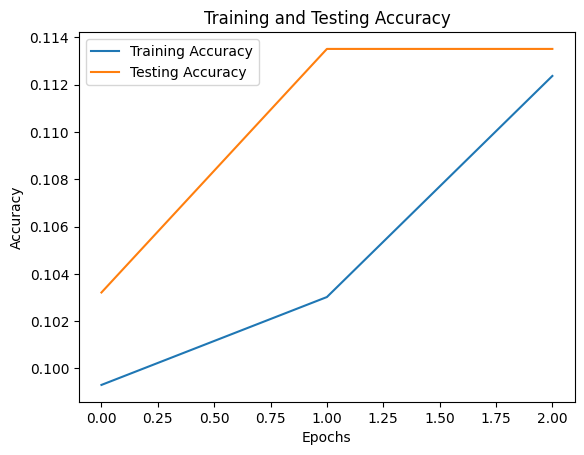

In [ ]:
print("Trial 4 :-With preprocessing Normalization, All 8 Convolutional Layers with different HyperParameters \n Different Activitation Function are used, Optimizer - SGD, Loss function - categorical_crossentropy. \n Batch Size = 890, Epochs = 3. Time Taken for Whole execution is approximately around 20 to 22 minutes\n \n Also the detailed logging of the training process is Shown Below: ")

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, utils
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Function to load and preprocess the data
def load_mnist_data(train_path, test_path):
    # Load the data
    train_df = pd.read_csv(train_path)
    test_df = pd.read_csv(test_path)

    # Separate features and labels
    train_labels = train_df.iloc[:, 0].values
    train_image_pixcels = train_df.iloc[:, 1:].values
    test_labels = test_df.iloc[:, 0].values
    test_image_pixcels = test_df.iloc[:, 1:].values

    # Reshape images to (28, 28, 1)
    train_image_pixcels = train_image_pixcels.reshape(-1, 28, 28, 1)
    test_image_pixcels = test_image_pixcels.reshape(-1, 28, 28, 1)

    # Normalize the pixel values to [0, 1]
    train_image_pixcels = train_image_pixcels.astype('float32') / 255
    test_image_pixcels = test_image_pixcels.astype('float32') / 255

    # Convert labels to one-hot encoded vectors
    train_labels = utils.to_categorical(train_labels, 10)
    test_labels = utils.to_categorical(test_labels, 10)

    return (train_image_pixcels, train_labels), (test_image_pixcels, test_labels)

# Load the MNIST data from local CSV files
train_path = '/content/drive/MyDrive/mnist_train.csv'
test_path = '/content/drive/MyDrive/mnist_test.csv'
(train_image_pixcels, train_labels), (test_image_pixcels, test_labels) = load_mnist_data(train_path, test_path)

#-------------------CNN Architecture-------------------
# Define the CNN model
model = models.Sequential()

# First Convolutional Layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Second Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third Convolutional Layer
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Fourth Convolutional Layer
model.add(layers.Conv2D(256, (1, 1), activation='tanh'))
model.add(layers.MaxPooling2D((1, 1)))

# Fifth Convolutional Layer
model.add(layers.Conv2D(128, (1, 1), activation='sigmoid'))
model.add(layers.MaxPooling2D((1, 1)))

# Sixth Convolutional Layer
model.add(layers.Conv2D(64, (1, 1), activation='relu'))

# Seventh Convolutional Layer
model.add(layers.Conv2D(32, (1, 1), activation='tanh'))

# Eighth Convolutional Layer
model.add(layers.Conv2D(16, (1, 1), activation='sigmoid'))

# Flatten Layer
model.add(layers.Flatten())

# Fully Connected Layer
model.add(layers.Dense(85, activation='relu'))

# Output Layer
model.add(layers.Dense(10, activation='softmax'))

# Compile the model with categorical crossentropy as the loss function and SGD optimizer
model.compile(optimizer='SGD',   #imp note SGD optimizer is not recommended as the output is not at all accurate , with same code i just changed the optimizer to ADAM its working fine
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_image_pixcels, train_labels, epochs=3,
                    validation_data=(test_image_pixcels, test_labels),
                    verbose=1, batch_size=890)

# Print the final training accuracy
train_accuracy = history.history['accuracy'][-1]
print(f'\nTraining accuracy: {train_accuracy}')

# Predict classes for test set
test_predictions = model.predict(test_image_pixcels)
test_predictions_classes = np.argmax(test_predictions, axis=1)
test_true_classes = np.argmax(test_labels, axis=1)

#-------------------Evaluation Parameters-------------------

# Calculate confusion matrix
conf_matrix = confusion_matrix(test_true_classes, test_predictions_classes)
# Print confusion matrix
print("\n Confusion Matrix:")
print(conf_matrix)

# Overall accuracy
accuracy = accuracy_score(test_true_classes, test_predictions_classes)
print("\n Accuracy:", accuracy)

# Precision for each class
precision = precision_score(test_true_classes, test_predictions_classes, average=None)
print("\n Precision for each class:")
print(precision)

# Macroaverage precision
macro_precision = precision_score(test_true_classes, test_predictions_classes, average='macro')
print("\n Macroaverage Precision:", macro_precision)

# Recall for each class
recall = recall_score(test_true_classes, test_predictions_classes, average=None)
print("\n Recall for each class:")
print(recall)

# Macroaverage recall
macro_recall = recall_score(test_true_classes, test_predictions_classes, average='macro')
print("\n Macroaverage Recall:", macro_recall)

# F1 score for each class
f1 = f1_score(test_true_classes, test_predictions_classes, average=None)
print("\n F1 score for each class:")
print(f1)

# Macroaverage F1 score
macro_f1 = f1_score(test_true_classes, test_predictions_classes, average='macro')
print("\n Macroaverage F1 Score:", macro_f1,"\n")


# Plotting training and testing accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()
plt.show()
